# Practical session 2 - Practise with classic libraries

Students (pair):
- [Student 1]([link](https://github.com/username1))
- [Student 2]([link](https://github.com/username2))

**Useful references for this lab**:

[1] `numpy`: [lecture notes (1.4.1-1.4.2)](https://scipy-lectures.org/intro/numpy/index.html) and [documentation](https://numpy.org/doc/stable/)

[2] `pandas`: [documentation](https://pandas.pydata.org/docs/getting_started/index.html), [quick tutorial](https://pandas.pydata.org/pandas-docs/version/0.15/10min.html)

[3] `matplotlib`: [lecture notes (1.5)](https://scipy-lectures.org/intro/matplotlib/index.html) and [documentation](https://matplotlib.org/)

[4] `h5py`: [quick start guide](http://docs.h5py.org/en/stable/quick.html#quick)

## <a name="content">Contents</a>
- [Exercise 1: Computing basic statistics](#ex1)
- [Exercise 2: Random variables and histograms](#ex2)
- [Exercise 3: Discrete isotropic total variation](#ex3)
---

In [2]:
%load_ext autoreload
%autoreload 2

---
## <a name="ex1">Exercise 1: Random variables and histograms</a>

In this exercise, we are interested in generating samples from the Gamma distribution $\mathcal{G}(\alpha,\beta)$, of probability density function (pdf)

\begin{equation}
    p(x) = \frac{\beta^\alpha}{\Gamma(\alpha)} x^{\alpha-1} \exp(-\beta x) \mathbb{1}_{\mathbb{R}_+^*}(x),
\end{equation}

and displaying their histogram. In the following, we consider $(\alpha, \beta) = (9, 2)$.

1\. Set the random seed to a fixed value for reproducibility, and biefly check your instruction works as intended.
> Hint: you may take a look at the following pages: [random module](https://numpy.org/doc/stable/reference/random/index.html?highlight=random#module-numpy.random), [random generator](https://numpy.org/doc/stable/reference/random/generator.html).

**Answer**:

In [3]:
# your code
import numpy as np
import random

random.seed(12345)
print(random.random())

0.41661987254534116


2\. Generate $\approx 10^5$ samples in a vector. Save the vector in a file, `samples.hdf5` or `samples.npy`.
> Warning / hint: 
> - take a careful look at the [documentation](https://numpy.org/doc/stable/reference/random/generated/numpy.random.gamma.html?highlight=gamma#numpy.random.gamma) (multiple conventions exist for the definition of the pdf underlying the distribution...);
> - to save data in a `npy` file, take a look at the example reported in the [Numpy documentation](https://numpy.org/doc/stable/reference/generated/numpy.save.html);
> - to save data in a `.h5` file, take a quick look at the [documentation here](https://docs.h5py.org/en/stable/quick.html#quick).

**Answer**:

In [4]:
# your code
sample = np.random.gamma(9,1/2,100000)
print(sample[0:11])

np.save("échantillon",sample)

[7.3103353  5.54218574 8.76672726 7.3040061  7.14570829 2.80191214
 5.87150111 2.99455217 5.43505261 4.94393818 4.83286173]


3\. Estimate an histogram of this distribution for a well chosen set of bins, and display it.
> Warnings: 
> - make sure the [histogram](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html?highlight=hist#matplotlib.pyplot.hist) corresponds to a probability density function (pdf);
> - do not forget to include a proper title with names for the axes.

**Answer**:

Text(0, 0.5, 'nb_échantillons')

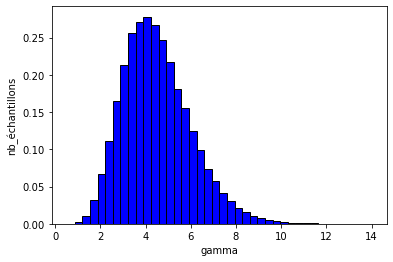

In [5]:
# your code
import matplotlib.pyplot as plt

plt.hist(sample,40,color = 'blue', edgecolor = 'black', density = True)
plt.xlabel("gamma")
plt.ylabel("nb_échantillons")

4\. Overlay the probability density function on the histogram and compare these in a few words. Save the resulting picture in `.png` format.
> Hint: 
> - take a look at the `scipy` [documentation](https://docs.scipy.org/doc/scipy/reference/stats.html) to avoid implementing the pdf from scratch;
> - return the bins in which the histogram is computed, and evaluate the pdf on those points.

**Answer**:

(array([2.67487527e-04, 2.16962105e-03, 9.98620099e-03, 3.25443157e-02,
        6.73176942e-02, 1.11631461e-01, 1.65277571e-01, 2.12949792e-01,
        2.56698863e-01, 2.70816260e-01, 2.78038423e-01, 2.67398364e-01,
        2.46207408e-01, 2.16754059e-01, 1.80643243e-01, 1.55588578e-01,
        1.24649187e-01, 9.85840139e-02, 7.32024198e-02, 5.68262390e-02,
        4.19955417e-02, 3.09691114e-02, 2.16664896e-02, 1.63464600e-02,
        1.08481052e-02, 7.81657994e-03, 4.51756711e-03, 3.44761701e-03,
        2.16962105e-03, 1.54548349e-03, 1.15911262e-03, 7.13300071e-04,
        7.43020907e-04, 2.08045854e-04, 5.94416726e-05, 8.91625088e-05,
        1.48604181e-04, 5.94416726e-05, 0.00000000e+00, 2.97208363e-05]),
 array([ 0.53522803,  0.87169232,  1.20815661,  1.54462089,  1.88108518,
         2.21754947,  2.55401376,  2.89047804,  3.22694233,  3.56340662,
         3.89987091,  4.23633519,  4.57279948,  4.90926377,  5.24572806,
         5.58219234,  5.91865663,  6.25512092,  6.59158521,

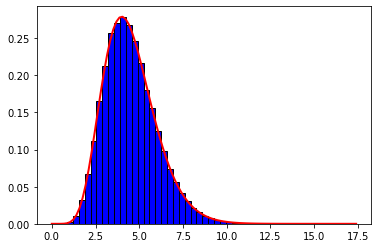

In [6]:
# your code
from scipy.stats import gamma
fig, ax = plt.subplots(1, 1)

a = 9
b = 2

x = np.linspace(gamma.ppf(0, a),
                gamma.ppf(0.99, a), 100)
ax.plot(x, gamma.pdf(x, a, 0, 1/b),
       'r-', lw=2, label='gamma pdf')

ax.hist(sample,40, color = 'blue', edgecolor = 'black', density = True)

---
## <a name="ex2">Exercise 2: Basic statistics with `pandas`</a>

In this second exercise, we focus on computing basic statistics, and applying linear regression to a small data set. These data are gathered in the following table, which gives the infant mortality (`X`) and the gross national product per inhabitant (`Y`) of 12 european countries :

| `X` | 190 | 128 | 180 | 212 | 56 | 192 | 68 | 98 | 110 | 197 | 181 | 233 |
|-----|-----|-----|-----|----|-----|----|----|-----|-----|-----|-----|-----|
| `Y` |  24 |  28 |  24 | 19 |  37 | 22 | 34 |  25 |  36 |  24 |  20 |  18 |

1\. For `X `and `Y`, compute the median, mean, variance and standard deviation. The data points have already been entered into a `.csv` file stored in `data/data.csv`.
> Hint: 
> - you can directly use `pandas` to load the data into a `DataFrame` ([`pd.read_csv`](https://pandas.pydata.org/docs/reference/frame.html));
> - take a look at the built-in operations available for `DataFrame` objects ([documentation](https://pandas.pydata.org/docs/reference/frame.html));
> - to display a `DataFrame` `f`:
> ```python 
> from IPython.display import display
> display(df)
> ```
> - sort the `DataFrame` with respect to the value of `X` (see [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html#pandas.DataFrame.sort_values)) This will be useful for question 3.

**Answer**:

In [7]:
# your code
import pandas as pd
data = pd.read_csv("data\data.csv")

x = data.X 
y = data.Y

xmedian = x.median()
xmean = x.mean()
xvar = x.var()
xstd = x.std()

print(xmedian,xmean,xvar,xstd)

ymedian = y.median()
ymean = y.mean()
yvar = y.var()
ystd = y.std()

print(ymedian,ymean,yvar,ystd)

data.sort_values("X")


180.5 153.75 3486.0227272727275 59.04255014201815
24.0 25.916666666666668 42.446969696969695 6.5151338970868204


,X,Y
4,56,37
6,68,34
7,98,25
8,110,36
1,128,28
2,180,24
10,181,20
0,190,24
5,192,22
9,197,24


2\. Give the equation of the regression line of `Y` as a function of `X`.
> Hint: 
> - take a look at the functionalities available in `numpy` (e.g., `np.polyfit` and `np.polyval`);
> - if needed, note that you can retrieve the data from the resulting `pandas` `DataFrame` with the `to_numpy()` method.

**Answer**:

In [8]:
# your code
data_np = data.to_numpy()
coeffs = np.polyfit(data_np[:,0],data_np[:,1],1)


3\. Display the cloud of points and the regression line $Y = f(X)$ on the same figure. Save the figure in `.png` format.

**Answer**:

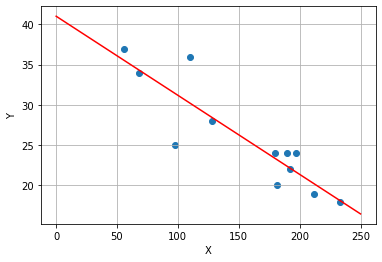

<Figure size 432x288 with 0 Axes>

In [19]:
# your code
plt.figure()

X = np.linspace(0,250,2)
Y = coeffs[0]*X + coeffs[1]

plt.plot(X,Y,'r')
plt.scatter(data_np[:,0], data_np[:,1])
plt.xlabel("X")
plt.ylabel("Y")
plt.grid()
plt.show()

plt.savefig("Plot generated using Matplotlib.png")

---
## <a name="ex3">Exercise 3: Discrete isotropic total variation</a>

This exercise is devoted to the computation of the discrete isotropic total variation (TV) of an input matrix $\mathbf{X} = [\mathbf{x}_n]_{1 \leq n \leq N} \in\mathbb{C}^{M \times N}$, which is particularly useful in Bayesian inference (e.g., for inverse problems) to promote piece-wise smooth solutions. The TV is defined as

\begin{equation*}
    \text{TV}(\mathbf{X}) = \Vert D(\mathbf{X}) \Vert_{1,2} = \sum_{m=1}^M \sum_{n=1}^N \sqrt{[\mathbf{XD}_h]^2_{m,n} + [\mathbf{D}_v\mathbf{X}]^2_{m,n}},
\end{equation*}

where $[\mathbf{Z}]_{m,n}$ denotes the elements in position $(m,n)$ of the matrix $\mathbf{Z}$,

\begin{align*}
    D(X) &= (\mathbf{XD}_h, \mathbf{D}_v\mathbf{X}) \in \mathbb{C}^{M\times N} \times \mathbb{C}^{M\times N} \\
    %
    \mathbf{XD}_h &= [\mathbf{x}_2-\mathbf{x}_1, \dotsc, \mathbf{x}_N-\mathbf{x}_{N-1}, \mathbf{0}_M] \in \mathbb{C}^{M\times N} \\
    %
    \mathbf{D}_v\mathbf{X} &= [\tilde{\mathbf{x}}_2^T-\tilde{\mathbf{x}}^T_1, \dotsc, \tilde{\mathbf{x}}^T_M-\tilde{\mathbf{x}}^T_{M-1}, \mathbf{0}_N]^T \in \mathbb{C}^{M\times N},
\end{align*}

$\mathbf{x}_n \in \mathbb{C}^{N}$ is the $n$-th column of $\mathbf{X}$, and $\tilde{\mathbf{x}}_m \in \mathbb{C}^{1\times M}$ is the $m$-th row of $\mathbf{X}$. 
The linear operator $D: \mathbb{C}^{M\times N} \rightarrow \mathbb{C}^{M\times N} \times \mathbb{C}^{M\times N} $ is the discrete gradient operator. The adjoint of $D$, $D^*: \mathbb{C}^{M\times N} \times \mathbb{C}^{M\times N} \rightarrow \mathbb{C}^{M\times N}$, is given by

\begin{align*}
    (\forall \mathbf{Y} = (\mathbf{Y}_h,\mathbf{Y}_v)), \quad D^*(\mathbf{Y}) &= \mathbf{Y}_h\mathbf{D}^*_h + \mathbf{D}^*_v\mathbf{Y}_v \\
    %
    \mathbf{Y}_h\mathbf{D}^*_h &= \big[-\mathbf{y}_{h,1},- [\mathbf{y}_{h,n}-\mathbf{y}_{h,n-1}]_{2 \leq n \leq N-1}, \mathbf{y}_{h, N-1} \big] \\
    %
    \mathbf{D}^*_v\mathbf{Y}_v &= \big[-\tilde{\mathbf{y}}_{v,1}^T,- [\tilde{\mathbf{y}}_{v,m}^T-\tilde{\mathbf{y}}^T_{v,m-1}]_{2 \leq m \leq M-1}, \tilde{\mathbf{y}}^T_{v, M-1} \big]^T
\end{align*}

where $\mathbf{y}_{h,n}$ is the $n$-th column of $\mathbf{Y}_h$, and $\tilde{\mathbf{x}}_{v,m}$ is the $m$-th row of $\mathbf{Y}_v$.

1\. Using `numpy`, implement a function `gradient2D` to compute the 2D discrete gradient operator $D$ applied to a matrix $\mathbf{X}\in\mathbb{C}^{M \times N}$ (no for loops!). Trigger an error message whenever the input array has more than 2 dimensions. If not clear from the implementation, add a few short comments to explain your code.

> Hint: 
> - to trigger an error, you can for instance use an `assert` statement, or raise an [exception (e.g., `AssertionError`)](https://docs.python.org/3/library/exceptions.html);
> - only a few operations are needed: computing vertical differences, horizontal differences, and possibly a concatenation of matrices into a single tensor (= n-dimensional array);
> - possibly useful functions: `np.diff`, `np.c_`, `np.r_` (or `np.concatenate`). 

**Answer**:

In [10]:
# your code

def gradient2D (X):
    nX = np.copy(X)
    
    assert len(np.shape(nX)) <= 2, "La dimension est supérieure à 2 !"
    XDh = np.diff(nX)
    XDh = np.c_[XDh,np.zeros(len(nX))]
    
    DvX = np.diff(nX.T)
    DvX = np.c_[DvX,np.zeros(len(nX.T))].T

    D = (XDh,DvX)

    return D


2\. Implement a unit-test to validate the behaviour of the `gradient2D` function. For instance, you can check the format of the output, and test the result when the functioni s evaluated on a constant matrix (for both a square and a non-square input matrix). Run the unit-test from the present Jupyter notebook.

**Answer**:

In [11]:
# your code
! python -m pytest tests/test_grad_unittest.py

============================= test session starts =============================
platform win32 -- Python 3.9.7, pytest-6.2.4, py-1.10.0, pluggy-0.13.1
rootdir: c:\Users\Jp190\Documents\Centrale Lille\S9\SDI\Python\python_sdia\Labs\Lab2
plugins: anyio-2.2.0
collected 4 items

tests\test_grad_unittest.py ....                                         [100%]

============================== warnings summary ===============================
..\..\..\..\..\..\..\..\anaconda3\lib\site-packages\pyreadline\py3k_compat.py:8
  c:\Users\Jp190\anaconda3\lib\site-packages\pyreadline\py3k_compat.py:8: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working
    return isinstance(x, collections.Callable)

-- Docs: https://docs.pytest.org/en/stable/warnings.html
======================== 4 passed, 1 warning in 0.37s =========================


3\. Document the function `gradient2D` with an appropriate docstring (see Lab 1).

**Answer**:

In [12]:
# your code
"""_summary_

:param X: a matrix of complex numbers
:type X: np.array
:raises AssertionError: if X has more than 2 dimensions
:return: returns the 2D discrete gradient operator to the matrix X.
Which is a couple of two other matrixes (XDh & DvX) defined following the formulas above
:rtype: tuple(np.array,np.array)
    
"""

'_summary_\n\n:param X: a matrix of complex numbers\n:type X: np.array\n:raises AssertionError: if X has more than 2 dimensions\n:return: returns the 2D discrete gradient operator to the matrix X.\nWhich is a couple of two other matrixes (XDh & DvX) defined following the formulas above\n:rtype: tuple(np.array,np.array)\n    \n'

4\. Using 1., define a function `tv` to compute $\text{TV}(\mathbf{X})$, $\mathbf{X}\in\mathbb{C}^{M \times N}$. Write a unit-test and document your function.

**Answer**:

In [13]:
# your code

def tv(X):
    """_summary_ 
    Compute the discrete isotopic total variation of a complex matrix.

    Args:
        X (np.array): a matrix of complex values.

    Returns:
        TV (complex): the discrete isotopic total variation of X.
    """
    D = gradient2D(X)
    XDh = D[0]
    DvX = D[1]

    TV = 0

    for i in range(len(X)) :
        for j in range(len(X[0])) :
            TV += np.sqrt(XDh[i][j]**2 + DvX[i][j]**2)

    return TV

! python -m pytest tests/test_tv_unittest.py

============================= test session starts =============================
platform win32 -- Python 3.9.7, pytest-6.2.4, py-1.10.0, pluggy-0.13.1
rootdir: c:\Users\Jp190\Documents\Centrale Lille\S9\SDI\Python\python_sdia\Labs\Lab2
plugins: anyio-2.2.0
collected 3 items

tests\test_tv_unittest.py ...                                            [100%]

============================== warnings summary ===============================
..\..\..\..\..\..\..\..\anaconda3\lib\site-packages\pyreadline\py3k_compat.py:8
  c:\Users\Jp190\anaconda3\lib\site-packages\pyreadline\py3k_compat.py:8: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working
    return isinstance(x, collections.Callable)

-- Docs: https://docs.pytest.org/en/stable/warnings.html
======================== 3 passed, 1 warning in 0.24s =========================


5\. Implement a function `gradient2D_adjoint` to compute $D^*(\mathbf{Y})$, the adjoint of the 2D discrete gradient operator $D$ applied to $\mathbf{Y}\in\mathbb{C}^{M \times N}\times \mathbb{C}^{M \times N}$. Add a few short comments to explain your code whenever appropriate.

**Answer**:

In [14]:
# your code
def gradient2D_adjoint (Yh,Yv):
    nYh = np.copy(Yh) # Copie de Yh
    nYv = np.copy(Yv) # Copie de Yv

    nYh1 = nYh[:,0] # On sauvegarde la première colonne de Yh
    nYhN = nYh[:,len(nYh)-1] # On sauvegarde l'avant-dernière colonne de Yh
    YhDh = np.diff(nYh) # On calcule les colonnes intermédiaires
    if(len(YhDh[0])-1 > 0): # On vérifie qu'il y en a
          YhDh = np.c_[-nYh1,-YhDh[:,:len(YhDh[0])-1]] # Si oui, on les concatène à la première colonne
    else:
          YhDh = np.array([-nYh1]).T # Sinon, on ne garde que la première colonne
    
    YhDh = np.c_[YhDh,nYhN] # On ajoute l'avant-dernière colonne pour obtenir le résultat


    nYv1 = nYv[0,:] # On sauvegarde la première ligne de Yv
    nYvN = nYv[len(nYh)-2,:] # On sauvegarde l'avant-dernière ligne de Yv
    DvYv = (np.diff(nYv.T)).T # On calcule les lignes intermédiaires
    if(len(DvYv)-1 > 0): # On vérifie qu'il y en a 
          DvYv = np.c_[-nYv1,-DvYv[:len(DvYv)-1,:].T].T # Si Oui, on les concatène à la première ligne
    else:
          DvYv = np.array([-nYv1]) # Sinon on ne garde que la première ligne
      
    DvYv = np.c_[DvYv.T,nYvN].T # On ajoute l'avant-dernière ligne pour obtenir le résultat

    return YhDh + DvYv # On somme nos deux matrices résultat



6\. Implement a unit-test to validate `gradient2D_adjoint`, e.g., by checking the size of the output from the function and verifying that `gradient2D_adjoint` is adjoint to `gradient2D`, i.e., for any $\mathbf{X}\in\mathbb{C}^{M \times N}$ and $\mathbf{Y}\in\mathbb{C}^{M \times N}\times \mathbb{C}^{M \times N}$:

\begin{equation}
    \forall \mathbf{X} \in \mathbb{C}^{M \times N}, \mathbf{Y} = (\mathbf{Y}_h, \mathbf{Y}_v) \in \mathbb{C}^{M \times N} \times \mathbb{C}^{M \times N}, \;
    %
    \langle D(\mathbf{X}), \mathbf{Y} \rangle_{\mathbb{C}^{M \times N} \times \mathbb{C}^{M \times N}} = \langle \mathbf{X}, D^*(\mathbf{Y}) \rangle_{\mathbb{C}^{M \times N}}, 
\end{equation}

where 

\begin{align}
    &\forall \mathbf{U}, \mathbf{V} \in \mathbb{C}^{M \times N}, \; \langle \mathbf{U}, \mathbf{V} \rangle_{\mathbb{C}^{M \times N}} = \text{Tr}(\mathbf{U}^H \mathbf{V}) = \sum_{m=1}^M \sum_{n=1}^N u_{m,n}^* v_{m,n}, \\
    &\forall \mathbf{U} = (\mathbf{U}_h, \mathbf{U}_v), \mathbf{V} = (\mathbf{V}_h, \mathbf{V}_v) \in \mathbb{C}^{M \times N} \times \mathbb{C}^{M \times N}, \; \langle \mathbf{U}, \mathbf{V} \rangle_{\mathbb{C}^{M \times N} \times \mathbb{C}^{M \times N}} = \langle \mathbf{U}_h, \mathbf{V}_h \rangle_{\mathbb{C}^{M \times N}} + \langle \mathbf{U}_v, \mathbf{V}_v \rangle_{\mathbb{C}^{M \times N}}.
\end{align}

> Hint: to verify `gradient2D_adjoint` is the adjoint of `gradient2D`, evaluate the scalar products above for randomly drawn matrices. Set the random generator to a known state for reproducibility (see [Exercise 1](#ex1)).

**Answer**:

In [15]:
# your code
! python -m pytest tests/test_adjoint_unittest.py

============================= test session starts =============================
platform win32 -- Python 3.9.7, pytest-6.2.4, py-1.10.0, pluggy-0.13.1
rootdir: c:\Users\Jp190\Documents\Centrale Lille\S9\SDI\Python\python_sdia\Labs\Lab2
plugins: anyio-2.2.0
collected 2 items

tests\test_adjoint_unittest.py ..                                        [100%]

============================== warnings summary ===============================
..\..\..\..\..\..\..\..\anaconda3\lib\site-packages\pyreadline\py3k_compat.py:8
  c:\Users\Jp190\anaconda3\lib\site-packages\pyreadline\py3k_compat.py:8: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working
    return isinstance(x, collections.Callable)

-- Docs: https://docs.pytest.org/en/stable/warnings.html
======================== 2 passed, 1 warning in 0.30s =========================


[Bonus, **optional**]. Generalize the `gradient2D` to any number of dimensions ($\mathbf{X} \in \mathbb{C}^{N_1 \times N_2 \times \dotsc \times N_p}$), i.e., by returning tensors obtained by computing differences along each of its dimensions.
> Hint: 
> - you may use a loops here, and/or list comprehension. Using slice objects (see [np.s_](https://numpy.org/doc/stable/reference/generated/numpy.s_.html?highlight=s_#numpy.s_) and [this page](https://stackoverflow.com/questions/24432209/python-index-an-array-using-the-colon-operator-in-an-arbitrary-dimension)) can be an interesting option.
>
> - the definition of the scalar product above can be extended to the case of tensors as follows:
> \begin{equation}
    \mathbf{U}, \mathbf{V} \in \mathbb{C}^{N_1 \times N_2 \times \dotsc \times N_p}, \; \langle \mathbf{U}, \mathbf{V} \rangle_{\mathbb{C}^{N_1 \times N_2 \times \dotsc \times N_p}} =  \sum_{n_1 = 1}^{N_1}  \sum_{n_2 = 1}^{N_2} \dotsc \sum_{n_p = 1}^{N_p} u_{n_1, n_2, \dotsc, n_p}^* v_{n_1, n_2, \dotsc, n_p}   
\end{equation}

**Answer**:

In [16]:
# your code

## Reference

```bibtex
@article{condat:hal-01309685,
  TITLE = {{Discrete Total Variation: New Definition and Minimization}},
  AUTHOR = {Condat, Laurent},
  URL = {https://hal.archives-ouvertes.fr/hal-01309685},
  JOURNAL = {{SIAM Journal on Imaging Sciences}},
  PUBLISHER = {{Society for Industrial and Applied Mathematics}},
  VOLUME = {10},
  NUMBER = {3},
  PAGES = {1258--1290},
  YEAR = {2017},
  MONTH = Aug,
  DOI = {10.1137/16M1075247},
  KEYWORDS = { variational image processing ; total variation ;  finite-difference schemes ;  coarea formula},
  PDF = {https://hal.archives-ouvertes.fr/hal-01309685v3/file/Condat-newTV.pdf},
  HAL_ID = {hal-01309685},
  HAL_VERSION = {v3},
}
```
